In [1]:
import numpy as np
import matplotlib.pyplot as plt

# CO2 Sequestration

(0.0, 1.0)

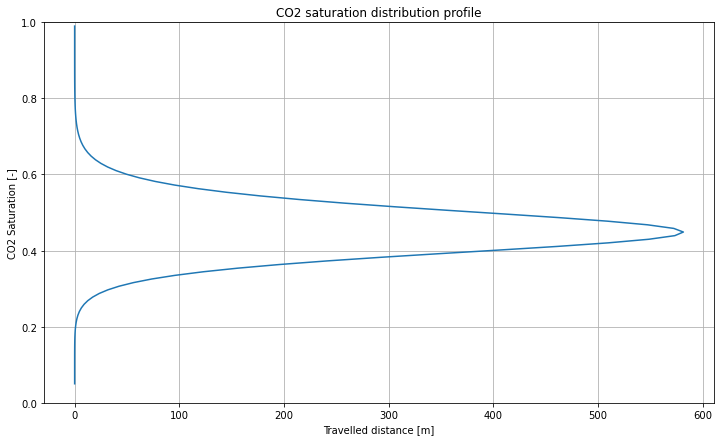

In [2]:
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]

mu_co2=0.016                          # CO2 viscosity [mPa.s]
mu_w=0.5                              # water viscosity [mPa.s]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
i_co2 = 0.20                      # Injection rate (CO2) [m^3/day]
t = 1461                       # Duration of injection [days]

S_co2 = np.linspace(Sco2,0.99,100)     # CO2 saturation [-]

Sw = np.linspace(0.99,0.166,100)      # water saturation [-]

L = 500

krco2_Swc=0.84                #krco2_Swc=((1-Swc)/(1-Swc))**n
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*(((1-Sw_Star)**2)*((1-Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

M=(krco2/mu_co2)*(mu_w/krw)     # Mobility Ratio [-]
f_co2 = M/(M+1)                  # CO2 frational flow
df_co2 = -np.gradient(f_co2,Sw)              # Derivative of CO2 fractional flow [-] 
x = i_co2*t/(A*phi)*df_co2

# ===================================Plot===================================
plt.figure(figsize=(12,7))
plt.plot(x,S_co2)
plt.xlabel('Travelled distance [m]')
plt.ylabel('CO2 Saturation [-]')
plt.title('CO2 saturation distribution profile')
plt.grid()
#plt.xlim(0,15)
plt.ylim(0,1.0)

# Fractional Flow

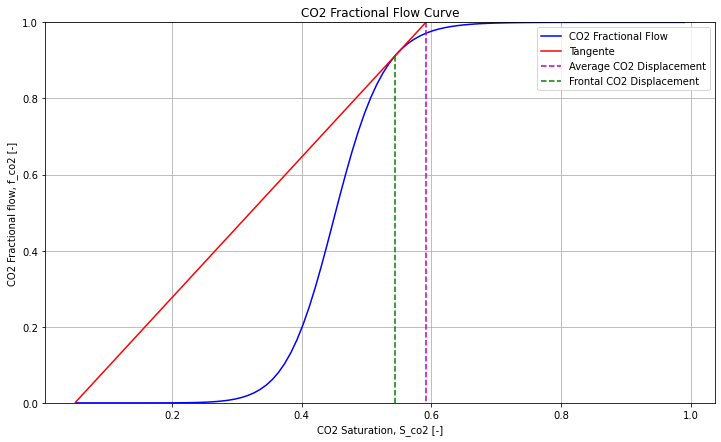

In [3]:
# ========Plotting the Fractional flow curve and its tangent===============
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]

mu_co2=0.016                          # CO2 viscosity [mPa.s]
mu_w=0.5                              # water viscosity [mPa.s]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
i_co2 = 0.20                      # Injection rate (CO2) [m^3/day]
t = 1461                       # Duration of injection [days]

S_co2 = np.linspace(0.051,0.99,100)     # CO2 saturation [-]
Sw = np.linspace(0.99,0.166,100)       # Water saturation [-]

L = 500

krco2_Swc=0.84                #krco2_Swc=((1-Swc)/(1-Swc))**n
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*(((1-Sw_Star)**2)*((1-Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

M=(krco2*mu_w)/(mu_co2*krw)     # Mobility Ratio [-]
f_co2 = M/(M+1)                  # Water frational flow
df_co2 = np.gradient(f_co2,S_co2)              # Derivative of CO2 fractional flow [-] 
x = i_co2*t/(A*phi)*df_co2

#===============================Tangent=================================
a=f_co2/(S_co2-Sco2)               # a is the slope df_CO2/dS_co2
a_max=np.max(a)              #   a_max Maximal value of vector a
tang = (a_max)*(S_co2-Sco2)     # Tangent in the form of y=a_max*Sw-a_max*Swc
ptr=np.argmax(a)           # Finding the position of the element equal
                              # to a_max in the vector a.
S_co2F = S_co2[52]                         # Water saturation at the front [-]    
f_co2F = a_max*(S_co2F-Sco2)                 # CO2 fractional flow at the front [-]  

S_co2AV= (S_co2F+Sco2*(f_co2F-1))/(f_co2F)         # Average CO2 saturation

# ===================================Plot===================================
xS_co2F = np.linspace(S_co2F,S_co2F,100) 
yS_co2F = np.linspace(f_co2F,0,100)
xS_co2AV= np.linspace(S_co2AV,S_co2AV,100)
yf_co2AV= np.linspace(1,0,100)
xf_co2F=  np.linspace(0,S_co2F,100)
yf_co2F=  np.linspace(f_co2F,f_co2F,100)

plt.figure(figsize=(12,7))
plt.plot(S_co2,f_co2,'b',label="CO2 Fractional Flow")
plt.plot(S_co2,tang,'r',label="Tangente")
plt.plot(xS_co2AV,yf_co2AV,'m--',label="Average CO2 Displacement")
plt.plot(xS_co2F,yS_co2F,'g--',label="Frontal CO2 Displacement")
plt.xlabel('CO2 Saturation, S_co2 [-]')
plt.ylabel('CO2 Fractional flow, f_co2 [-]')
plt.title('CO2 Fractional Flow Curve')
plt.ylim(0,1)
plt.legend(loc="upper right")
plt.grid()

# Displacement Profile between Injector and Producer

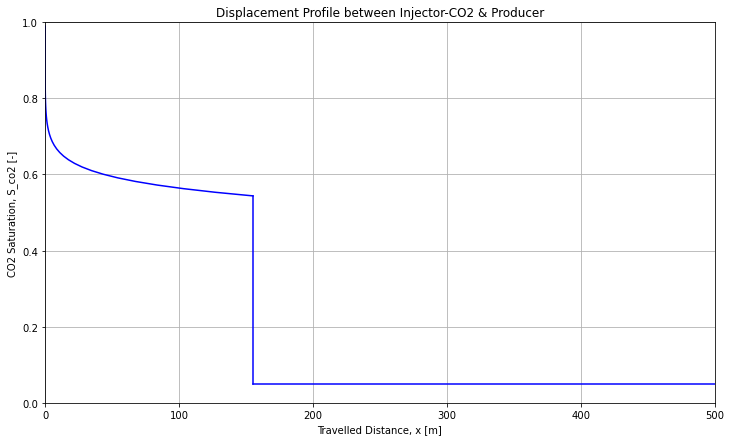

In [10]:
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]

mu_co2=0.016                          # CO2 viscosity [mPa.s]
mu_w=0.5                              # water viscosity [mPa.s]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
i_co2 = 0.20                      # Injection rate (CO2) [m^3/day]
t = 1461                       # Duration of injection [days]

S_co2 = np.linspace(Sco2,0.99,100)       # CO2 saturation [-]
Sw = np.linspace(0.99,0.166,100)         # Water saturation [-]


L = 500

krco2_Swc=0.84                #krco2_Swc=((1-Swc)/(1-Swc))**n
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*(((1-Sw_Star)**2)*((1-Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

M=(krco2*mu_w)/(mu_co2*krw)
#M=(krco2/mu_co2)*(mu_w/krw)     # Mobility Ratio [-]
f_co2 = M/(M+1)                  # Water frational flow
df_co2 = np.gradient(f_co2,S_co2)              # Derivative of water fractional flow [-] 
x = i_co2*t/(A*phi)*df_co2

#===============================At Front=================================
xF = x[52]                 # CO2 position at the front [m]
vF = xF/t                  # CO2 velocity at the front [m/day]
S_co2F = S_co2[52]               #  CO2 saturation at the front [-]
f_co2F = a_max*(S_co2F-Sco2)       # CO2 fractional flow at the front [-]

xG=x[52:100]
S_co2G=S_co2[52:100]

# ===========================At Breakthrough=============================
PV=(phi*A*L)                  #  Total flooded pattern Pore Volume [m^3]
t_BT=(PV)/(i_co2*df_co2[52])        #  Breakthrough time [days]
PV2=1/df_co2[52]
# =============================Average Sw===================================
S_co2AV=(S_co2F+Sco2*(f_co2F-1))/(f_co2F);     # Average CO2 saturation [-]

# ========================Recovery Factor at BT=============================
EDBT = (S_co2AV-Sco2)/(1-Sco2)    # Displacement efficiency @ BT [-]
WiBT = t_BT*i_co2               # Cumulative CO2 injection @ BT [m^3]

## ===================================Plot===================================
xS_co2F = np.linspace(xF,xF,100)
yS_co2F = np.linspace(S_co2F,Sco2,100)
xSco2 = np.linspace(xF,L,100)
ySco2 = np.linspace(Sco2,Sco2,100)
xS_co2AV= np.linspace(0,L,100)
yS_co2AV= np.linspace(1-Swc,S_co2AV,100)
xAV= np.linspace(L,L,100)
yAV=np.linspace(S_co2AV,Sco2,100)

plt.figure(figsize=(12, 7))
plt.plot(xG,S_co2G,'b',xS_co2F,yS_co2F,'b-',xSco2,ySco2,'b-')

plt.title('Displacement Profile between Injector-CO2 & Producer')
plt.xlabel('Travelled Distance, x [m]')
plt.ylabel('CO2 Saturation, S_co2 [-]')
plt.xlim(0,500)
plt.ylim(0,1)
plt.grid()

# Relative Permeability

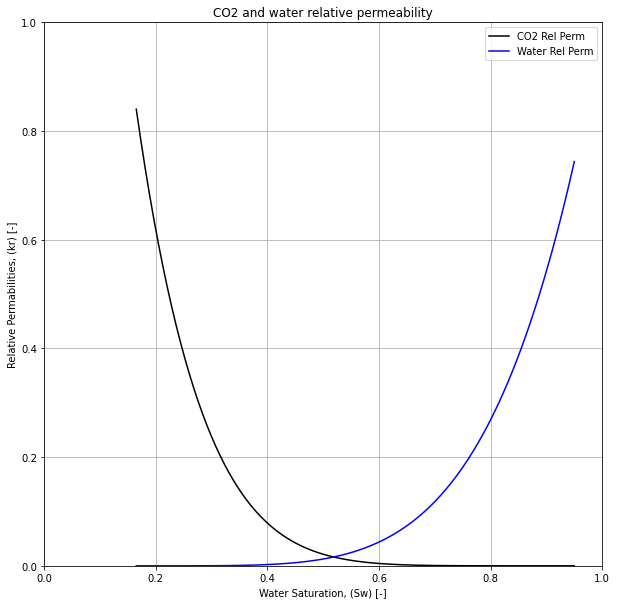

In [9]:
#=====================Relative permeabilities==============================
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]
Sw = np.linspace(Swc,1-Sco2,100)       # Water saturation [-]

                                #krco2_Swc=((1-Swc)/(1-Swc))**n
krco2_Swc=0.84
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*(((1-Sw_Star)**2)*((1-Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

#==================================Plot====================================
plt.figure(figsize=(10,10))

plt.plot(Sw,krco2,'k-',label="CO2 Rel Perm")
plt.plot(Sw,krw,'b-',label="Water Rel Perm")
plt.xlabel('Water Saturation, (Sw) [-]')
plt.ylabel('Relative Permabilities, (kr) [-]')
plt.title('CO2 and water relative permeability')

plt.legend(loc="upper right")

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

In [ ]:
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.3                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = ((1-Sw_Star)**2)*((1-Sw_Star)**n)     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

In [ ]:
kro_Swc_OWS

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.mgrid[-1:1:10j, -1:1:10j, -1:1:10j]

T = np.exp(-X**2 - Y**2 - Z**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X, Y, Z, c=Z.flatten(), alpha=0.5)
fig.colorbar(scat, shrink=0.5, aspect=5)

In [ ]:
import pyvista as pv
import numpy as np

In [ ]:
values = np.linspace(0, 10, 1000).reshape((20, 5, 10))
values.shape

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_arrays["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True)

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pytest
from helpers import *
from scipy.io import loadmat

class TestGravityColumn:

    def test_gravityColumn(self):
        import numpy as np

        import prst
        import prst.incomp as incomp
        import prst.gridprocessing as gridprocessing
        import prst.utils as utils
        import prst.params as params
        import prst.solvers as solvers
        from prst.utils.units import centi, poise, kilogram, meter, bar, darcy

        prst.gravity_reset()
        G = gridprocessing.cartGrid([1, 1, 30], [1, 1, 30])
        gridprocessing.computeGeometry(G)
        rock = params.rock.Rock(G, perm=0.1*darcy, poro=1)
        fluid = incomp.fluid.SingleFluid(viscosity=1*centi*poise,
                                         density=1014*kilogram/meter**3)
        bc = params.wells_and_bc.BoundaryCondition()
        bc.addPressureSide(G, "top", 100*bar)
        T = solvers.computeTrans(G, rock)
        resSol = solvers.initResSol(G, p0=0.0)
        psol = incomp.incompTPFA(resSol, G, T, fluid, bc=bc)

        # Load MRST results and compare solution pressure, flux, saturation,
        # facePressure.
        matfile = getpath("test_example_gravityColumn/sol.mat")
        msol = loadmat(matfile, squeeze_me=True, struct_as_record=False)["sol"]
        msol_pressure = np.atleast_2d(msol.pressure).transpose()
        msol_flux = np.atleast_2d(msol.flux).transpose()
        msol_s = np.atleast_2d(msol.s).transpose()
        msol_facePressure = np.atleast_2d(msol.facePressure).transpose()

        assert np.allclose(psol.pressure, msol_pressure, rtol=1e-11)
        assert np.allclose(psol.flux, msol_flux, rtol=1e-11)
        assert np.allclose(psol.s, msol_s, rtol=1e-11)
        assert np.allclose(psol.facePressure, msol_facePressure, rtol=1e-11)